# 01_exploration.ipynb

Notebook d'exploration initiale du jeu de données Car Insurance.

## 1. Imports et chargement des données

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Chargement des données
df = pd.read_csv('../data/car_insurance.csv')
df.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


## 2. Aperçu des données

In [16]:
print('Dimensions :', df.shape)
display(df.describe(include='all').T)

Dimensions : (10000, 18)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,10000.0,NaN,NaN,NaN,500521.9068,290030.768758,101.0,249638.5,501777.0,753974.5,999976.0
age,10000.0,NaN,NaN,NaN,1.4895,1.025278,0.0,1.0,1.0,2.0,3.0
gender,10000.0,NaN,NaN,NaN,0.499,0.500024,0.0,0.0,0.0,1.0,1.0
driving_experience,10000,4,0-9y,3530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,10000,3,high school,4157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,10000,4,upper class,4336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_score,9018.0,NaN,NaN,NaN,0.515813,0.137688,0.053358,0.417191,0.525033,0.618312,0.960819
vehicle_ownership,10000.0,NaN,NaN,NaN,0.697,0.459578,0.0,0.0,1.0,1.0,1.0
vehicle_year,10000,2,before 2015,6967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
married,10000.0,NaN,NaN,NaN,0.4983,0.500022,0.0,0.0,0.0,1.0,1.0


## 3. Valeurs manquantes

In [17]:
df.isna().sum()

id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64

## 4. Distribution des variables clés

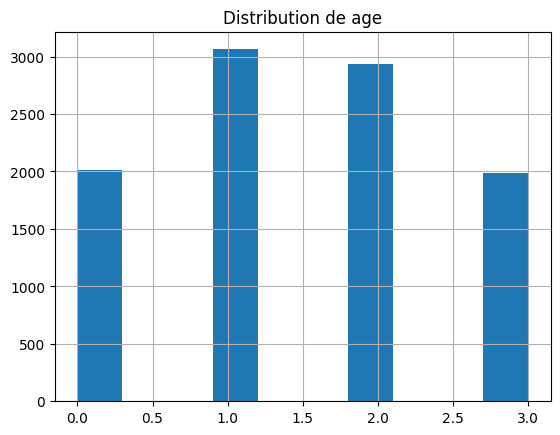

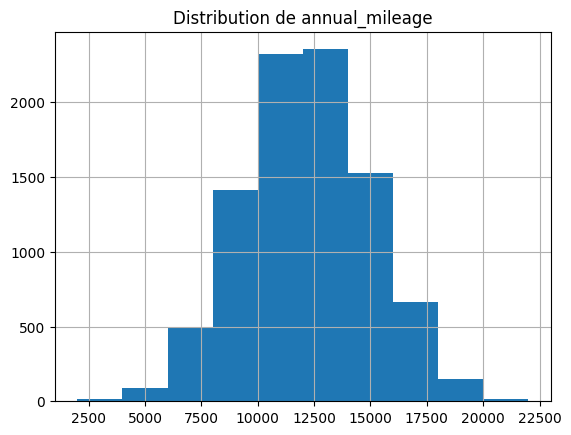

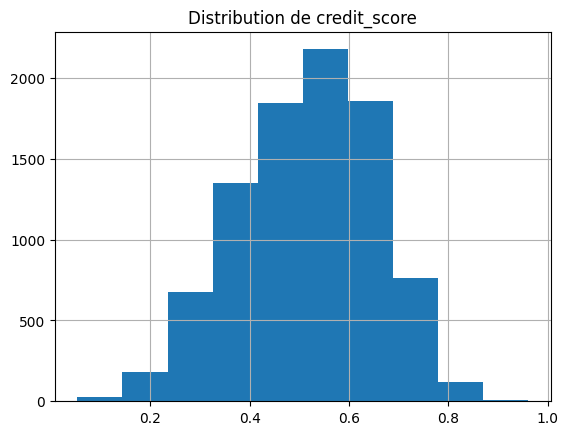

In [18]:
for col in ['age', 'annual_mileage', 'credit_score']:
    df[col].hist()
    plt.title(f'Distribution de {col}')
    plt.show()

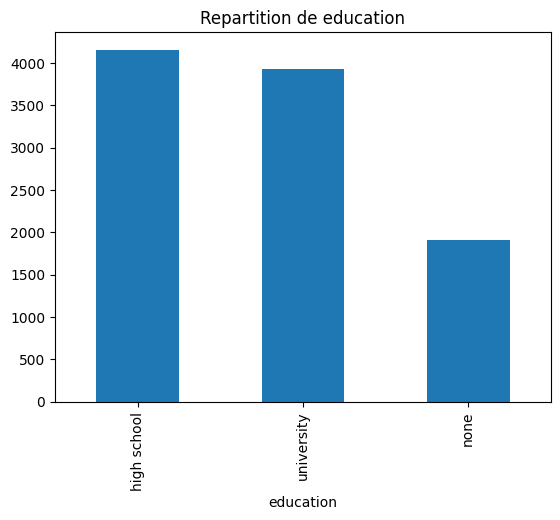

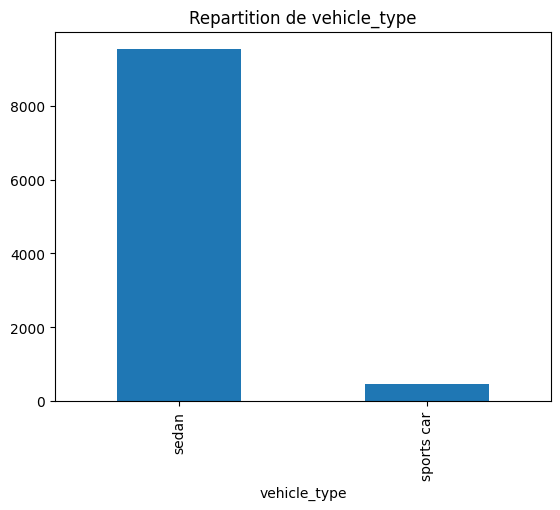

In [19]:
for col in ['education', 'vehicle_type']:
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Repartition de {col}')
    plt.show()

## 5. Premières observations

- **Variables à encoder**
  - Ex. `education`, `vehicle_type`, …

- **Variables à normaliser**
  - Ex. `age`, `annual_mileage`, `credit_score`, …

- **Anomalies potentielles**
  - Valeurs extrêmes (outliers) voire erreurs de saisie
  - Distributions très déséquilibrées
  - Corrélations inattendues


## 6. Traitement des valeurs manquantes


In [21]:
from sklearn.impute import SimpleImputer

# 6.1. Bilan
print("Valeurs manquantes par colonne :")
print(df.isna().sum().sort_values(ascending=False))

# 6.2. Imputation
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

imp_num = SimpleImputer(strategy='median')
df[num_cols] = imp_num.fit_transform(df[num_cols])

imp_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imp_cat.fit_transform(df[cat_cols])

print("\nAprès imputation, valeurs manquantes restantes :")
print(df.isna().sum().sum())


Valeurs manquantes par colonne :
id                     0
age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64

Après imputation, valeurs manquantes restantes :
0


## 7. Détection et traitement des outliers


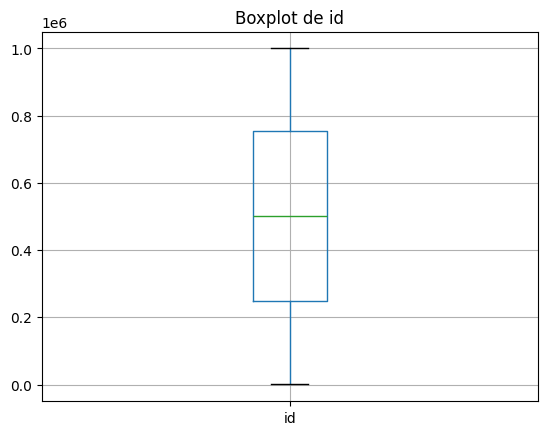

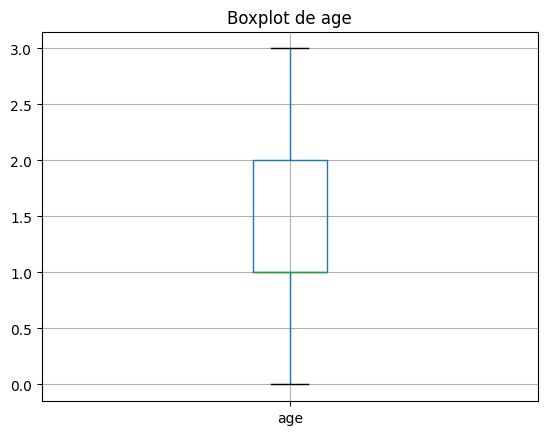

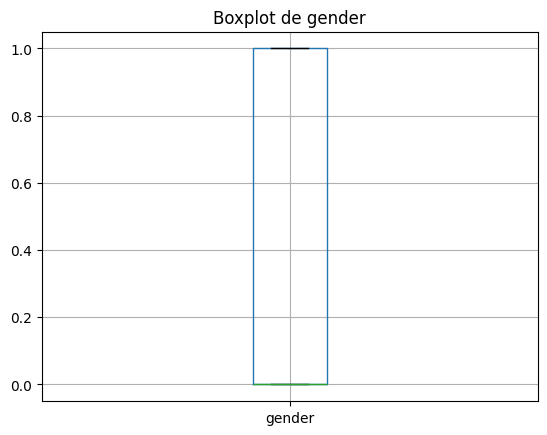

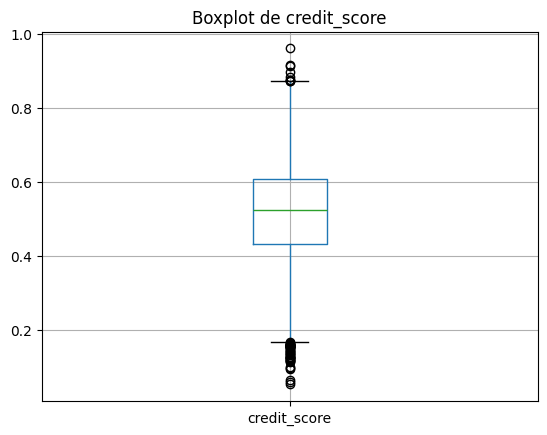

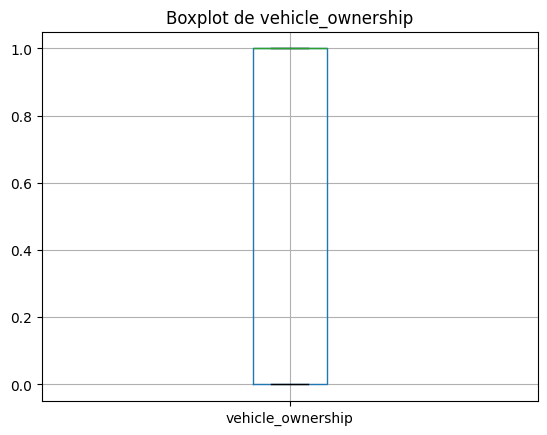

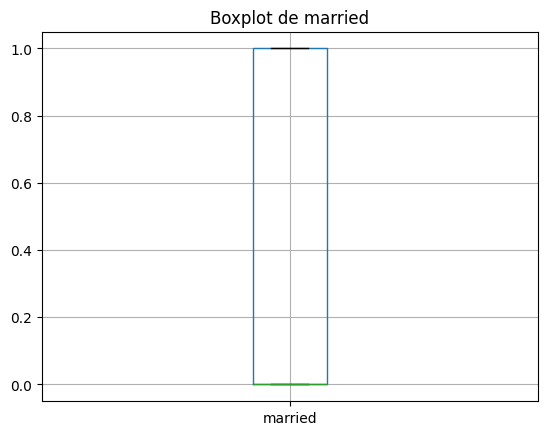

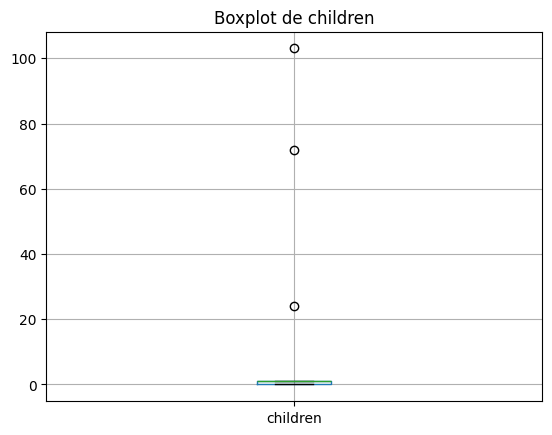

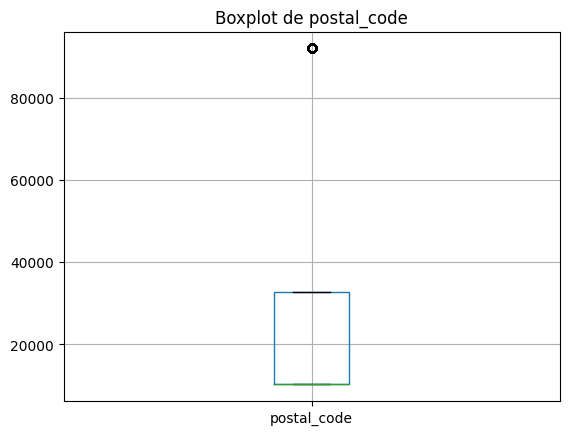

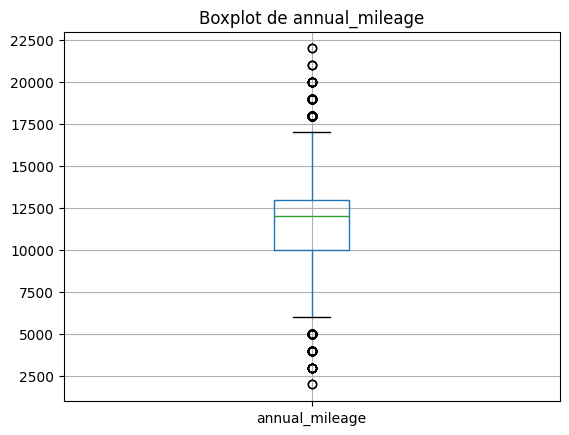

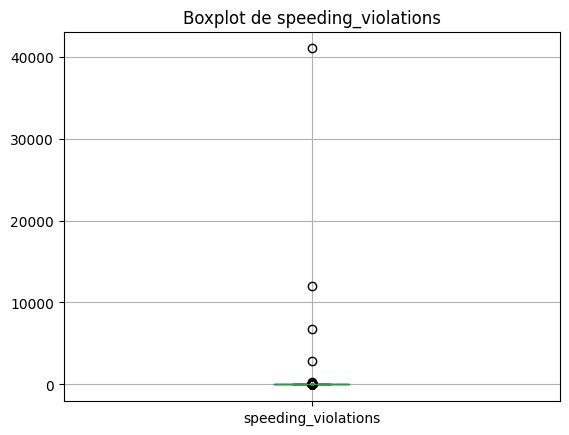

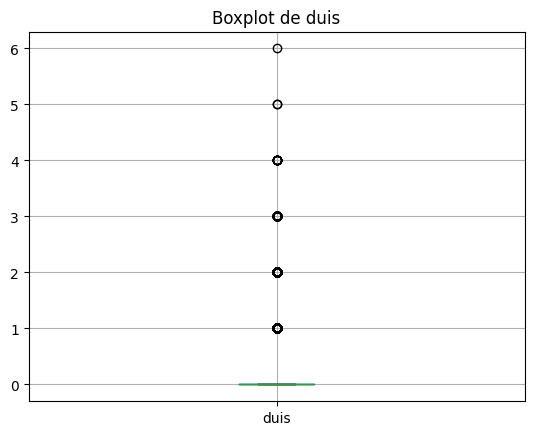

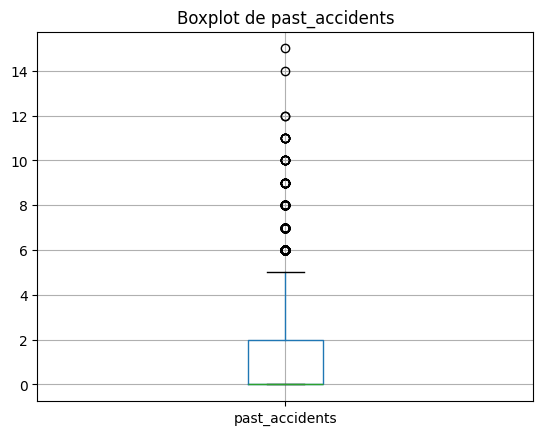

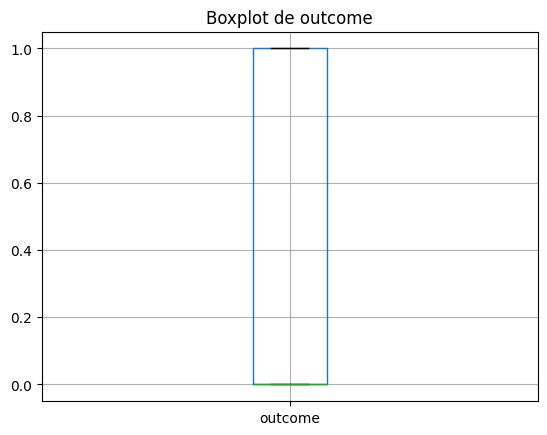

Dimensions après suppression des outliers : (6380, 18)


In [22]:
# 7.1. Boxplots pour repérer les outliers
for c in num_cols:
    plt.figure()
    df.boxplot(column=c)
    plt.title(f'Boxplot de {c}')
    plt.show()

# 7.2. Suppression des points à ±1.5× IQR
def remove_outliers(df, cols):
    for c in cols:
        Q1, Q3 = df[c].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        mask = df[c].between(Q1 - 1.5*IQR, Q3 + 1.5*IQR)
        df = df[mask]
    return df

df = remove_outliers(df, num_cols)
print("Dimensions après suppression des outliers :", df.shape)


## 8. Encodage des variables catégorielles


In [23]:
# 8.1. One-Hot pour nominales
to_ohe = ['vehicle_type', 'education']  # adaptez selon vos colonnes
df = pd.get_dummies(df, columns=to_ohe, drop_first=True)

# 8.2. Vérification
print("Colonnes après encodage :", df.columns.tolist())


Colonnes après encodage : ['id', 'age', 'gender', 'driving_experience', 'income', 'credit_score', 'vehicle_ownership', 'vehicle_year', 'married', 'children', 'postal_code', 'annual_mileage', 'speeding_violations', 'duis', 'past_accidents', 'outcome', 'vehicle_type_sports car', 'education_none', 'education_university']


## 9. Mise à l’échelle des variables numériques


In [24]:
from sklearn.preprocessing import StandardScaler

num_cols = df.select_dtypes(include='number').columns.tolist()
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# 9.1. Aperçu
display(df.head())


,id,age,gender,driving_experience,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome,vehicle_type_sports car,education_none,education_university
0,0.249229,1.79997,-0.888889,0-9y,upper class,0.960269,0.710434,after 2015,-0.879883,0.755417,-0.580521,0.009875,-0.594581,0.0,-0.583658,-0.805344,False,False,False
1,0.870294,-1.21785,1.125000,0-9y,poverty,-1.108373,-1.407590,before 2015,-0.879883,-1.323772,-0.580521,1.656970,-0.594581,0.0,-0.583658,1.241706,False,True,False
2,-1.020133,-1.21785,-0.888889,0-9y,working class,-0.075931,0.710434,before 2015,-0.879883,-1.323772,-0.580521,-0.401899,-0.594581,0.0,-0.583658,-0.805344,False,False,False
3,-0.062099,-1.21785,1.125000,0-9y,working class,-2.265538,0.710434,before 2015,-0.879883,0.755417,1.758004,-0.401899,-0.594581,0.0,-0.583658,-0.805344,False,False,True
4,0.806071,-0.21191,1.125000,10-19y,working class,-0.874957,0.710434,before 2015,-0.879883,-1.323772,1.758004,0.009875,1.064837,0.0,0.916639,1.241706,False,True,False


## 10. Séparation en jeux d’apprentissage et de test


In [28]:
from sklearn.model_selection import train_test_split

# Séparer features et cible
X = df.drop('outcome', axis=1)
y = df['outcome']

# print(X.dtypes)

# Split (80% train / 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Taille train :", X_train.shape, " - Taille test :", X_test.shape)
print("Répartition cible train :", y_train.value_counts(normalize=True))
print("Répartition cible test  :", y_test.value_counts(normalize=True))


id                         float64
age                        float64
gender                     float64
driving_experience          object
income                      object
credit_score               float64
vehicle_ownership          float64
vehicle_year                object
married                    float64
children                   float64
postal_code                float64
annual_mileage             float64
speeding_violations        float64
duis                       float64
past_accidents             float64
vehicle_type_sports car       bool
education_none                bool
education_university          bool
dtype: object
Taille train : (5104, 18)  - Taille test : (1276, 18)
Répartition cible train : outcome
-0.805344    0.606583
 1.241706    0.393417
Name: proportion, dtype: float64
Répartition cible test  : outcome
-0.805344    0.606583
 1.241706    0.393417
Name: proportion, dtype: float64


## 11. Modélisation initiale


In [45]:
from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import mean_squared_error, r2_score
import numpy as np

# 11.1. Entraînement
reg = LinearRegression()
reg.fit(X_train, y_train)

# 11.2. Prédictions
y_pred = reg.predict(X_test)

# 11.3. Évaluation
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print(f"MSE   : {mse:.2f}")
print(f"RMSE  : {rmse:.2f}")
print(f"R²    : {r2:.2f}")






MSE   : 0.59
RMSE  : 0.77
R²    : 0.41


## 12. Validation croisée


In [48]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model    import LinearRegression
import numpy as np
import pandas as pd

# 12.1. Préparation des données
X_all = df.drop(['id', 'outcome'], axis=1)
y_all = df['outcome']

# 12.2. Encodage des variables catégorielles
cat_cols = X_all.select_dtypes(include=['object']).columns.tolist()
print("Catégorielles encodées :", cat_cols)
X_all = pd.get_dummies(X_all, columns=cat_cols, drop_first=True)

# 12.3. K-Fold (5 splits)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 12.4. Cross-validation pour la régression
scores = cross_val_score(
    LinearRegression(),
    X_all, y_all,
    scoring='neg_mean_squared_error',
    cv=cv,
    n_jobs=-1
)

# 12.5. Conversion en MSE et RMSE
mse_cv  = -scores
rmse_cv = np.sqrt(mse_cv)

# 12.6. Affichage des résultats
print(f"CV MSE   : {np.mean(mse_cv):.2f} ± {np.std(mse_cv):.2f}")
print(f"CV RMSE  : {np.mean(rmse_cv):.2f} ± {np.std(rmse_cv):.2f}")




Catégorielles encodées : ['driving_experience', 'income', 'vehicle_year']
CV MSE   : 0.58 ± 0.02
CV RMSE  : 0.76 ± 0.01


## 13. Comparaison de plusieurs modèles


In [53]:
from sklearn.linear_model     import LogisticRegression, Perceptron
from sklearn.neighbors        import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score, KFold
import numpy as np
import pandas as pd

# 13.1. Définition de la cible binaire
# On transforme 'outcome' continu en 0/1 : 1 si un sinistre a eu lieu (outcome > 0), 0 sinon
y_class = (df['outcome'] > 0).astype(int)

# 13.2. Préparation des features
X_class = df.drop(['id', 'outcome'], axis=1)

# Encodage des catégorielles (s’il en reste)
cat_cols = X_class.select_dtypes(include=['object']).columns.tolist()
if cat_cols:
    X_class = pd.get_dummies(X_class, columns=cat_cols, drop_first=True)

# Mise à l’échelle des numériques (optionnel pour certains classifieurs)
from sklearn.preprocessing import StandardScaler
num_cols = X_class.select_dtypes(include=['number']).columns.tolist()
scaler = StandardScaler()
X_class[num_cols] = scaler.fit_transform(X_class[num_cols])

# 13.3. Configuration du CV
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 13.4. Instanciation des classifieurs
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'Perceptron'        : Perceptron(max_iter=1000),
    'KNeighbors'        : KNeighborsClassifier(n_neighbors=5)
}

# 13.5. Évaluation par validation croisée (accuracy)
results = []
for name, model in models.items():
    scores = cross_val_score(
        model, X_class, y_class,
        scoring='accuracy',
        cv=cv,
        n_jobs=-1
    )
    results.append((name, np.mean(scores), np.std(scores)))

# 13.6. Affichage des résultats
df_results = pd.DataFrame(results, columns=['Model','Accuracy_Mean','Accuracy_STD'])
display(df_results.sort_values('Accuracy_Mean', ascending=False))



,Model,Accuracy_Mean,Accuracy_STD
0,LogisticRegression,0.813793,0.011287
2,KNeighbors,0.765831,0.011586
1,Perceptron,0.731505,0.026992


## 14. Hyperparameter tuning avec GridSearchCV


In [54]:
from sklearn.model_selection   import GridSearchCV, KFold
from sklearn.ensemble          import RandomForestRegressor
from sklearn.metrics           import make_scorer, mean_squared_error
import numpy as np
import pandas as pd

# 14.1. Préparation des données (encodées)
X = df.drop(['id','outcome'], axis=1)
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
if cat_cols:
    X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
y = df['outcome']

# 14.2. Définir le modèle et la grille
model_rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth'   : [None, 5, 10],
    'min_samples_split': [2, 5]
}

# 14.3. GridSearchCV
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    estimator    = model_rf,
    param_grid   = param_grid,
    scoring      = make_scorer(mean_squared_error, greater_is_better=False),
    cv           = cv,
    n_jobs       = -1,
    verbose      = 1
)

grid.fit(X, y)
print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur RMSE CV    :", np.sqrt(-grid.best_score_))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Meilleurs paramètres : {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 500}
Meilleur RMSE CV    : 0.7397376645135606


## 15. Sérialisation du modèle


In [57]:
import pickle

# Récupérer le meilleur modèle
best_rf = grid.best_estimator_

# Sauvegarde
with open('../models/best_model_rf.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

print("Modèle sauvegardé dans models/best_model_rf.pkl")


Modèle sauvegardé dans models/best_model_rf.pkl
